In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AverageDailySentiment')

In [3]:
df

,DATE,mean
0,2009-04-06,0.151274
1,2009-04-07,0.166819
2,2009-04-08,0.151094
3,2009-04-09,0.151094
4,2009-04-10,0.151094
...,...,...
76,2009-06-21,-0.026538
77,2009-06-22,-0.067278
78,2009-06-23,-0.055279
79,2009-06-24,-0.047212


<AxesSubplot:>

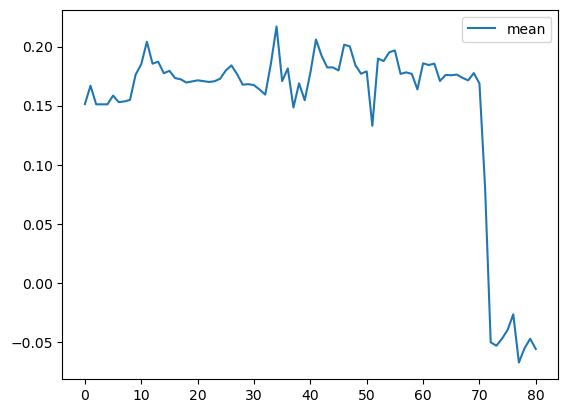

In [4]:
df.plot(method=scatter)

In [5]:
pip install statsmodels

In [13]:
import statsmodels.api as sm

model = sm.tsa.ExponentialSmoothing(df['mean'], trend="add", seasonal="add", seasonal_periods=7)
fitted_model = model.fit(smoothing_level=0.3, smoothing_trend=0.1, smoothing_seasonal=0.5)
forecast_horizon = 7
forecasts = fitted_model.forecast(steps=forecast_horizon)

print("Forecasts:", forecasts)


Forecasts: 81   -0.072425
82   -0.058327
83   -0.045006
84   -0.071917
85   -0.085870
86   -0.119986
87   -0.157419
dtype: float64


In [15]:
forecasts=pd.DataFrame(forecasts, columns = ['mean'])

In [16]:
forecasts

,mean
81,-0.072425
82,-0.058327
83,-0.045006
84,-0.071917
85,-0.085870
86,-0.119986
87,-0.157419


In [11]:
means =pd.DataFrame(df['mean'])
means

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
76,-0.026538
77,-0.067278
78,-0.055279
79,-0.047212


In [18]:
one_week = pd.concat([means, forecasts], axis = 0)
one_week

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
83,-0.045006
84,-0.071917
85,-0.085870
86,-0.119986


In [94]:
def hwes(alpha,beta,gamma, period):
    model = sm.tsa.ExponentialSmoothing(df['mean'], trend="add", seasonal="add", seasonal_periods=period)
    fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    forecast_horizon = 30 
    forecasts = fitted_model.forecast(steps=forecast_horizon)
    
    forecasts=pd.DataFrame(forecasts, columns = ['mean'])
    means =pd.DataFrame(df['mean'])
    one_week = pd.concat([means, forecasts], axis = 0)
    one_week.plot(kind='line')
    return one_week

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,-0.276787
107,-0.310903
108,-0.348336
109,-0.326981


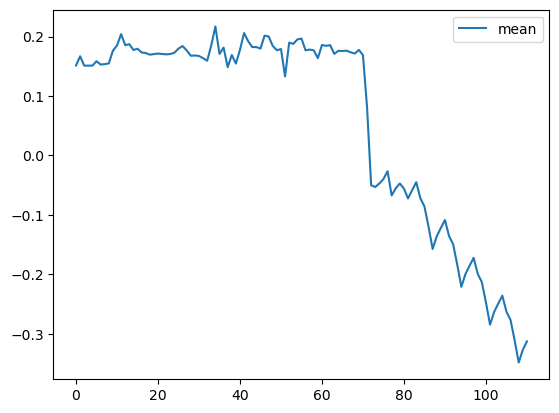

In [95]:
hwes(0.3,0.1,0.5,7)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,-0.087246
107,-0.108870
108,-0.100828
109,-0.103160


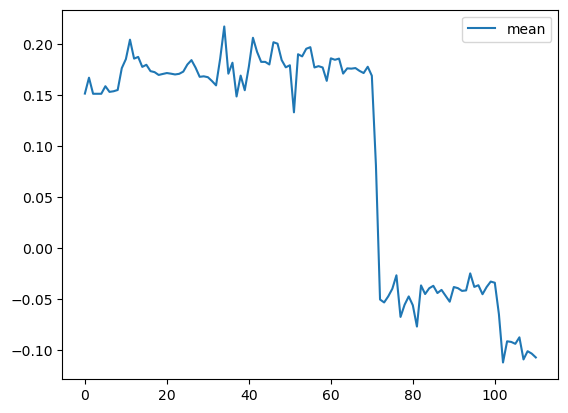

In [96]:
hwes(0.8,0.5,0.3,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,-0.091856
107,-0.148288
108,-0.109622
109,-0.098340


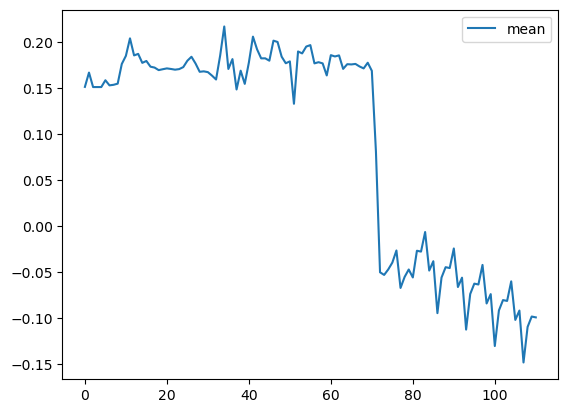

In [97]:
hwes(0.8,0.001,0.8,7)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.032667
107,0.018280
108,0.016032
109,0.016673


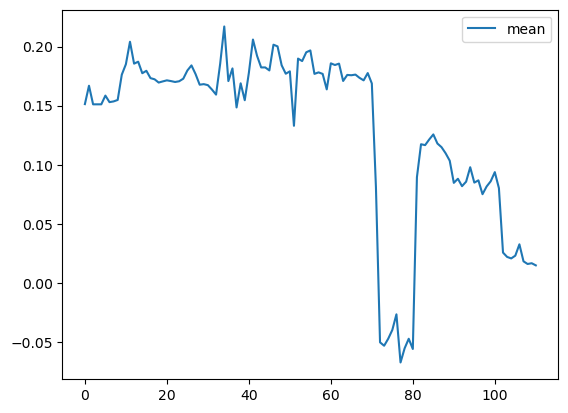

In [98]:
hwes(0.0001,0.01,0.001,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.041668
107,0.027187
108,0.024838
109,0.025381


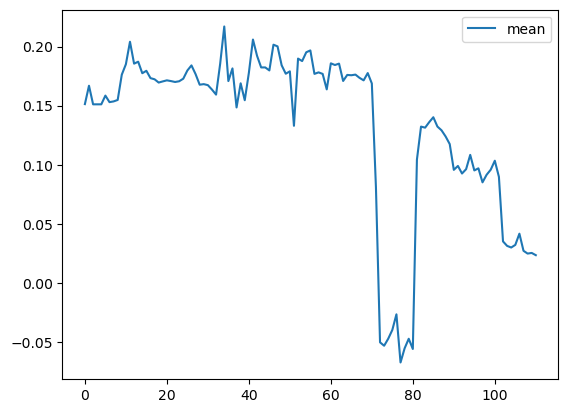

In [99]:
hwes(0.001,0.5,0.001,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.010607
107,-0.011357
108,-0.010185
109,-0.007823


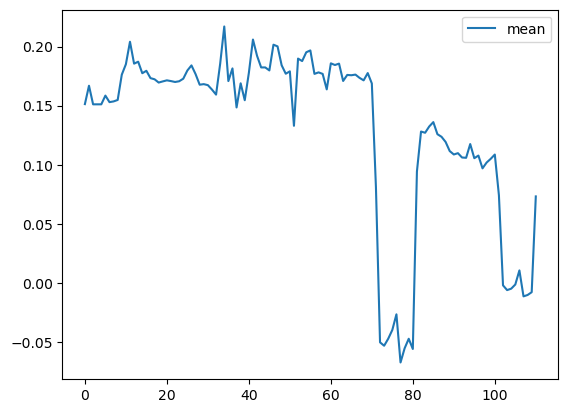

In [100]:
hwes(0.0001,0.9,0.5,30)